# Evaluation of models to generate a document deformation mesh in an image.

Author: Maciej Kubiś

Date: 2025-03-24

The notebook will allow evaluation of various AI models created using **PyTorch**. Various architectures modeled on **U-Net** will be tested.

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython.display import clear_output
import os
import numpy as np

import sys
sys.path.append("../src") 

from data_generator import DocumentImageGenerator
from neuralnet_handler import NeuralNetHandler
from unet_flexible import UNetFlexible

## Configuration

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
generator = DocumentImageGenerator("../src/assets/text.txt")

nn_handler = NeuralNetHandler(None, generator, device, 1, 0.01, 1)

Using device: cpu
Model is None. Please provide a valid model using set_model() method.


## Models evaluation chart

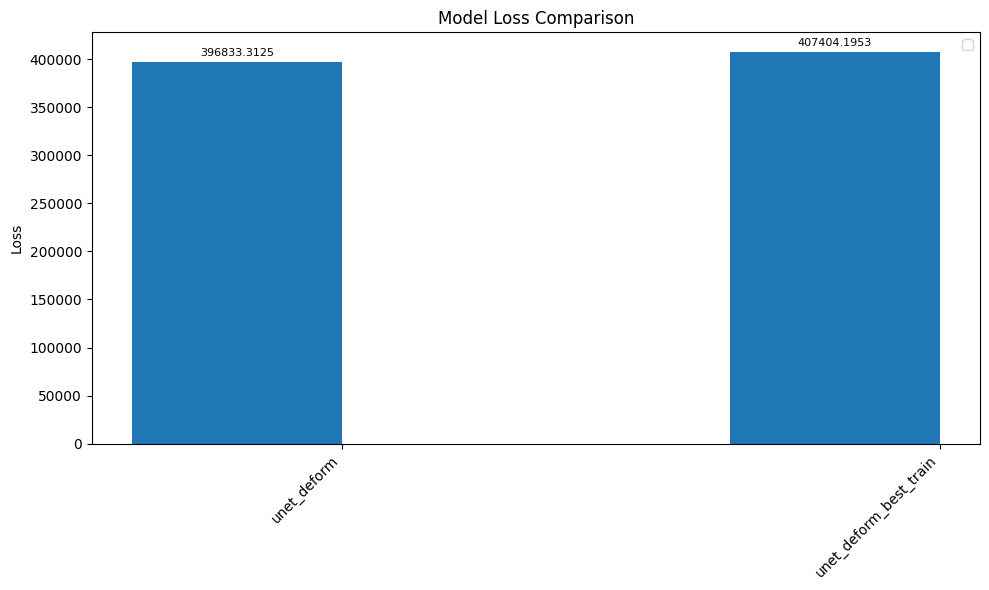

In [4]:
models_folder = "../models"
model_files = [
    os.path.splitext(f)[0]
    for f in os.listdir(models_folder)
    if f.endswith(".pth") and "checkpoint" not in f and "val" not in f
]

print("Available models:")
for model in model_files:
    print(model)

loss = []

for model in model_files:
    print(f"Evaluating model: {model}")
    nn_handler.set_model(f"{models_folder}/{model}.pth", model, UNetFlexible)
    nn_handler.evaluate()
    loss.append(nn_handler.get_current_val_loss())


# X positions for bars
x = np.arange(len(model_files))

# Width of a single bar
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars
bars1 = ax.bar(x - width/2, loss, width)

ax.set_ylabel('Loss')
ax.set_title('Model Loss Comparison')
ax.set_xticks(x)
ax.set_xticklabels(model_files, rotation=45, ha='right')
ax.legend()

for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{height:.4f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=8)

clear_output(wait=True)

plt.tight_layout()
plt.show()